In [1]:
from main import main
import pandas as pd 
from sklearn.metrics import adjusted_rand_score , silhouette_score , normalized_mutual_info_score ,fowlkes_mallows_score
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

def evaluate_metrics(coordinate_file_truth , coordinate_file_pred , apply_gene_similarity = False , apply_AD_weight = False):
    truth_data = pd.read_csv(coordinate_file_truth)
    pred_data = pd.read_csv(coordinate_file_pred)
    
    ARI = adjusted_rand_score(truth_data['group'] , pred_data['group'])
    NMI = normalized_mutual_info_score(truth_data['group'], pred_data['group'])
    Silhouette = silhouette_score(pred_data[['x', 'y']], pred_data['group'])
    FMI = fowlkes_mallows_score(truth_data['group'], pred_data['group'])
    SGD = main(coordinate_file_truth , coordinate_file_pred ,apply_gene_similarity = apply_gene_similarity , apply_AD_weight=apply_AD_weight)
    
    return ARI, NMI, Silhouette, FMI, SGD


## 100个 Ratio A/B 从0.1到0.9

Graph Building took 0.02 seconds.
Getting edge attributes took 16.43 seconds.
Entire Loop took 7.61804 seconds.
Entire Loop took 8.20783 seconds.
Entire Loop took 14.23668 seconds.
Graph Building took 0.02 seconds.
Getting edge attributes took 29.84 seconds.
Entire Loop took 7.96599 seconds.
Entire Loop took 10.01029 seconds.
Entire Loop took 13.08171 seconds.
Graph Building took 0.03 seconds.
Getting edge attributes took 27.81 seconds.
Entire Loop took 7.52222 seconds.
Entire Loop took 8.40283 seconds.
Entire Loop took 13.88244 seconds.
Graph Building took 0.03 seconds.
Getting edge attributes took 25.66 seconds.
Entire Loop took 9.90723 seconds.
Entire Loop took 9.87455 seconds.
Entire Loop took 11.79088 seconds.
Graph Building took 0.01 seconds.
Getting edge attributes took 17.14 seconds.
Entire Loop took 9.30215 seconds.
Entire Loop took 9.62235 seconds.
Entire Loop took 12.25415 seconds.
Graph Building took 0.03 seconds.
Getting edge attributes took 26.24 seconds.
Entire Loop took

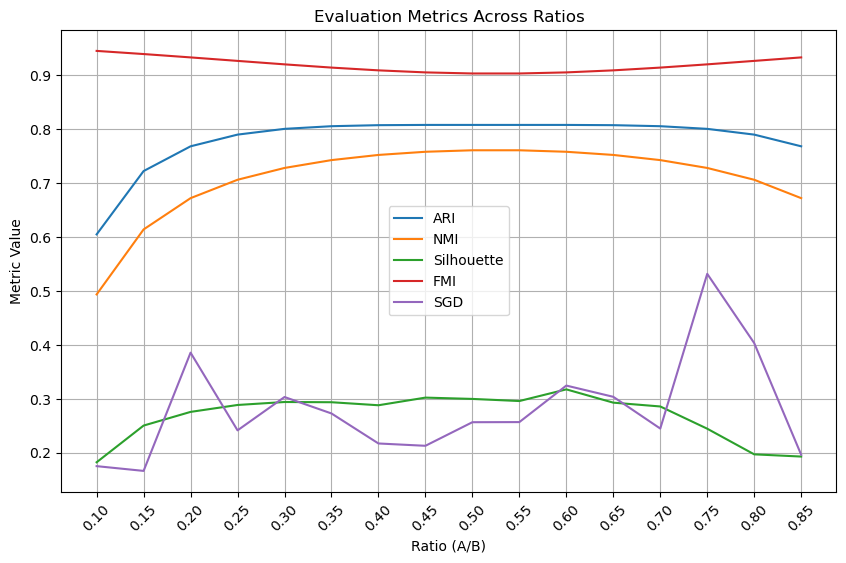

In [2]:
results = {'ARI': [], 'NMI': [], 'Silhouette': [], 'FMI': [], 'SGD': []}

start = 0.10
end = 0.90
step = 0.05
x_ticks = []

while start <= end:
    coordinate_file_truth = f"data/simulate/Case3 (imbalance)/ratio/{start:.2f}_truth_SpatialData.csv"
    coordinate_file_pred = f"data/simulate/Case3 (imbalance)/ratio/{start:.2f}_SpatialData.csv"
    
    ARI, NMI, Silhouette, FMI, SGD = evaluate_metrics(coordinate_file_truth, coordinate_file_pred, apply_gene_similarity=False, apply_AD_weight=False)
    results['ARI'].append(ARI)
    results['NMI'].append(NMI)
    results['Silhouette'].append(Silhouette)
    results['FMI'].append(FMI)
    results['SGD'].append(SGD)
    
    x_ticks.append(start)
    start += step


plt.figure(figsize=(10, 6))
x_positions = range(1, len(x_ticks) + 1)

for key in results:
    plt.plot(x_positions, results[key], label=key)

plt.xlabel('Ratio (A/B)')
plt.ylabel('Metric Value')
plt.title('Evaluation Metrics Across Ratios')
plt.legend()
plt.xticks(x_positions, [f'{i:.2f}' for i in x_ticks], rotation=45)
plt.grid(True)
plt.show()

## 1000个 A 分错5个

In [3]:
results = {'ARI': [], 'NMI': [], 'Silhouette': [], 'FMI': [], 'SGD': []}

for i in range(1, 10):
    coordinate_file_truth = f"data/simulate/Case3/test/Case3_1000/0.{i}_truth_SpatialData.csv"
    coordinate_file_pred = f"data/simulate/Case3/test/Case3_1000/0.{i}_SpatialData.csv"
    ARI, NMI, Silhouette, FMI, SGD = evaluate_metrics(coordinate_file_truth, coordinate_file_pred, apply_gene_similarity=False, apply_AD_weight=False)
    results['ARI'].append(ARI)
    results['NMI'].append(NMI)
    results['Silhouette'].append(Silhouette)
    results['FMI'].append(FMI)
    results['SGD'].append(SGD)

# 绘制折线图
plt.figure(figsize=(10, 6))
for key in results:
    plt.plot(range(1, 10), results[key], label=key)

plt.xlabel('Ratio (A/B)')
plt.ylabel('Metric Value')
plt.title('Evaluation Metrics Across Ratios')
plt.legend()
plt.xticks(range(1, 10), [f'0.{i}' for i in range(1, 10)])
plt.grid(True)
plt.show()

Graph Building took 0.06 seconds.
Getting edge attributes took 0.02 seconds.


KeyboardInterrupt: 